<a href="https://colab.research.google.com/github/Kevinsamuelgitau/W9-IP/blob/master/SAM_GITAU_W9_IP_NOTEBOOK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [1]:
# Importing all libraries required for analysis
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# LOADING THE DATASETS

In [2]:
# Loading and previewing the dataset
df_train= pd.read_csv('train_w9.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Loading and previewing the second dataset
df_test= pd.read_csv('/content/test_w9.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# CHECKING THE DATA

In [13]:
# Checking number of records
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [18]:
# Checking datatypes
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [20]:
# checking basic statistics
print(df_train.describe())
print(df_test.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.3923

# TIDYING THE DATASET

In [9]:
# checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# we drop Cabin column because it has too many missing 
df_train.drop("Cabin", axis=1, inplace=True)

In [12]:
# Drop remaining null values from the dataset
# shape before droping the null values
print(df_train.shape)

# Droping null values
df_new =df_train.dropna()

#shape of the new dataset
df_new.shape

(891, 11)


(712, 11)

In [13]:
# Remove duplicated values

df_new.drop_duplicates().all()

PassengerId     True
Survived       False
Pclass          True
Name            True
Sex             True
Age             True
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool

In [16]:
# to remove white spaces from our columns

df_new.columns = df_new.columns.str.strip().str.replace('','').str.lower()
df_new.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

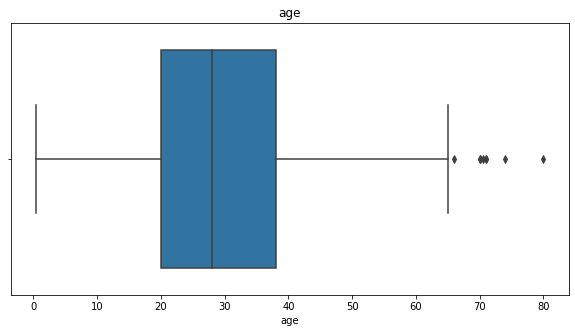

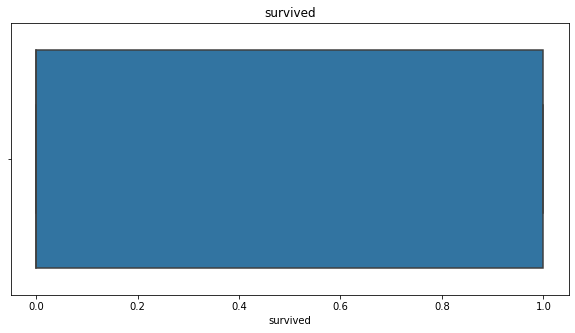

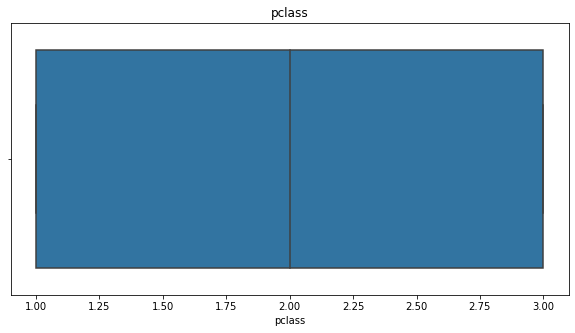

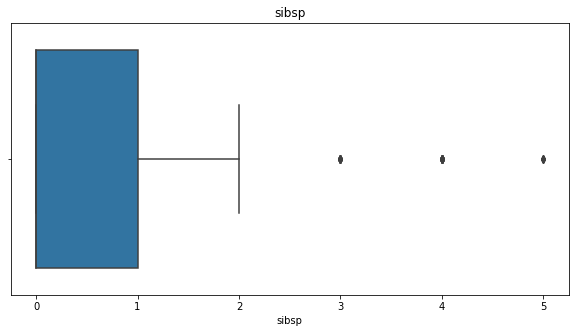

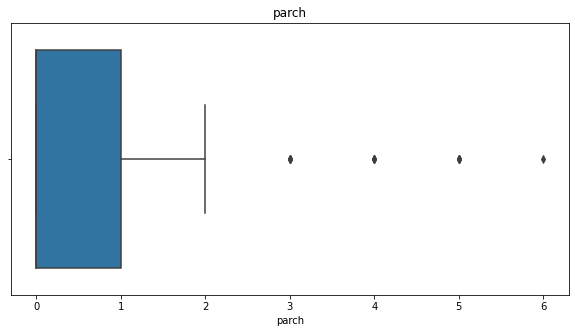

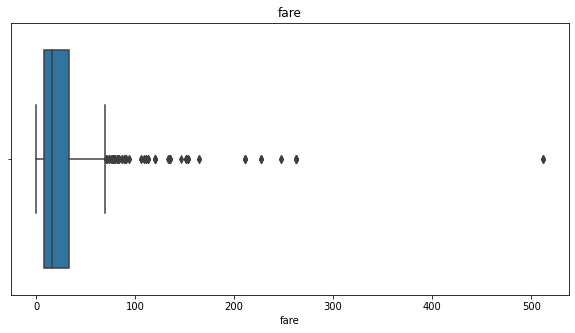

In [21]:
# to check for outliers in the numerical 
numerical = ['age','survived','pclass','sibsp','parch','fare']
for i, j in enumerate(numerical):
  plt.figure(figsize=(10,5))
  plt.title(j)
  sns.boxplot(df_new[j])

In [23]:
df_new.to_csv('wk9_train_clean')

# EXPLORATORY ANALYSIS

# UNIVARIATE

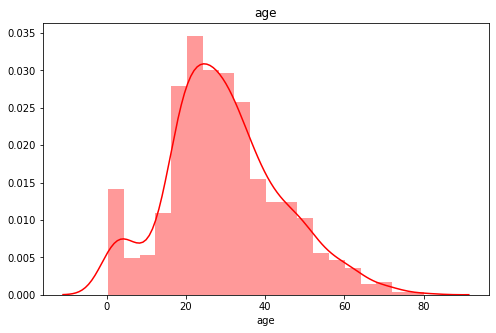

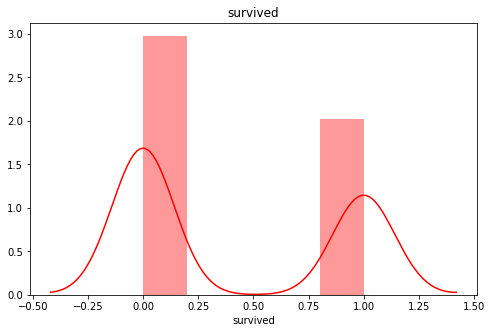

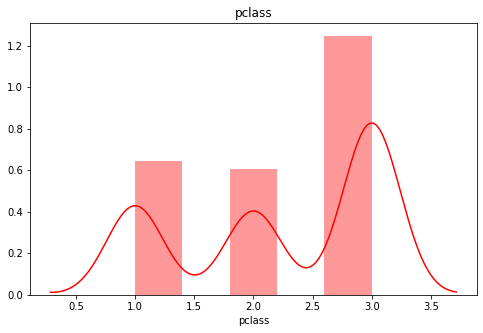

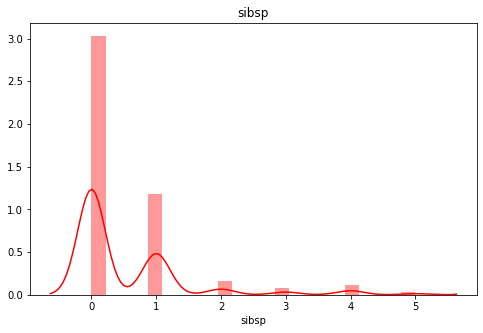

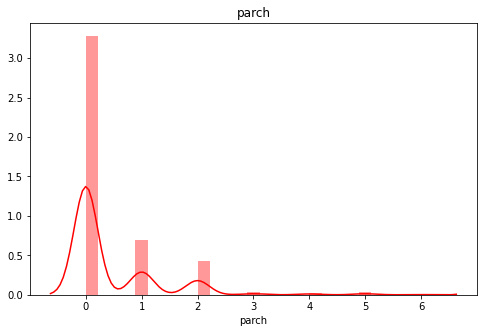

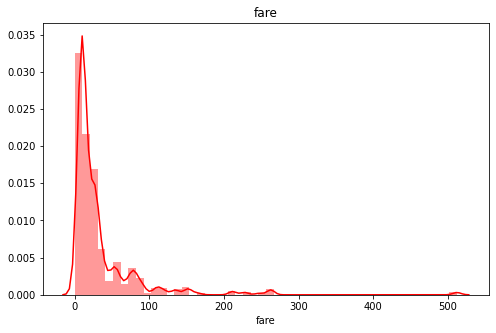

In [22]:
# Plot histogram for numerical values


for i, j in enumerate(numerical):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(df_new[j], color='red', norm_hist=True)

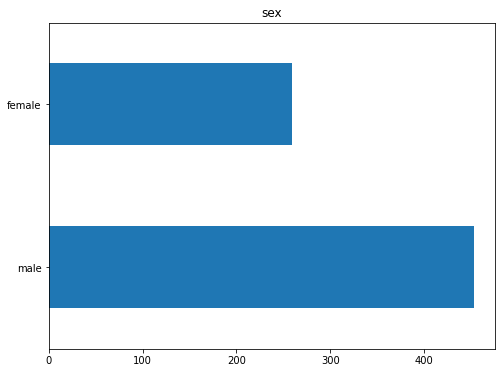

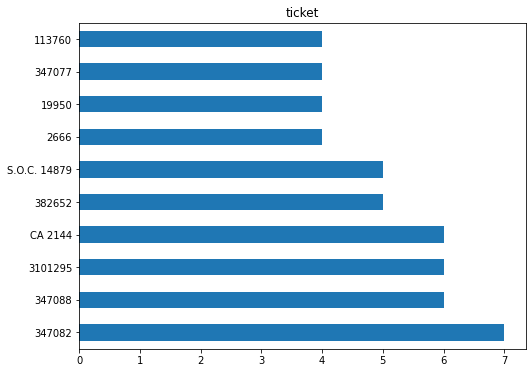

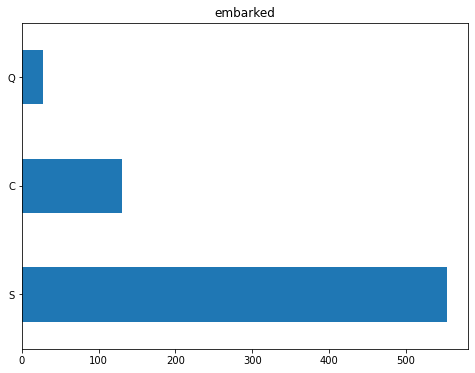

In [27]:
column = ['sex','ticket','embarked']
for i,c in enumerate(column):
  
  plt.figure(figsize= (8,6))
  plt.title(c)
  df_new[c].value_counts()[:10].plot(kind = 'barh')

# BIVARIATE

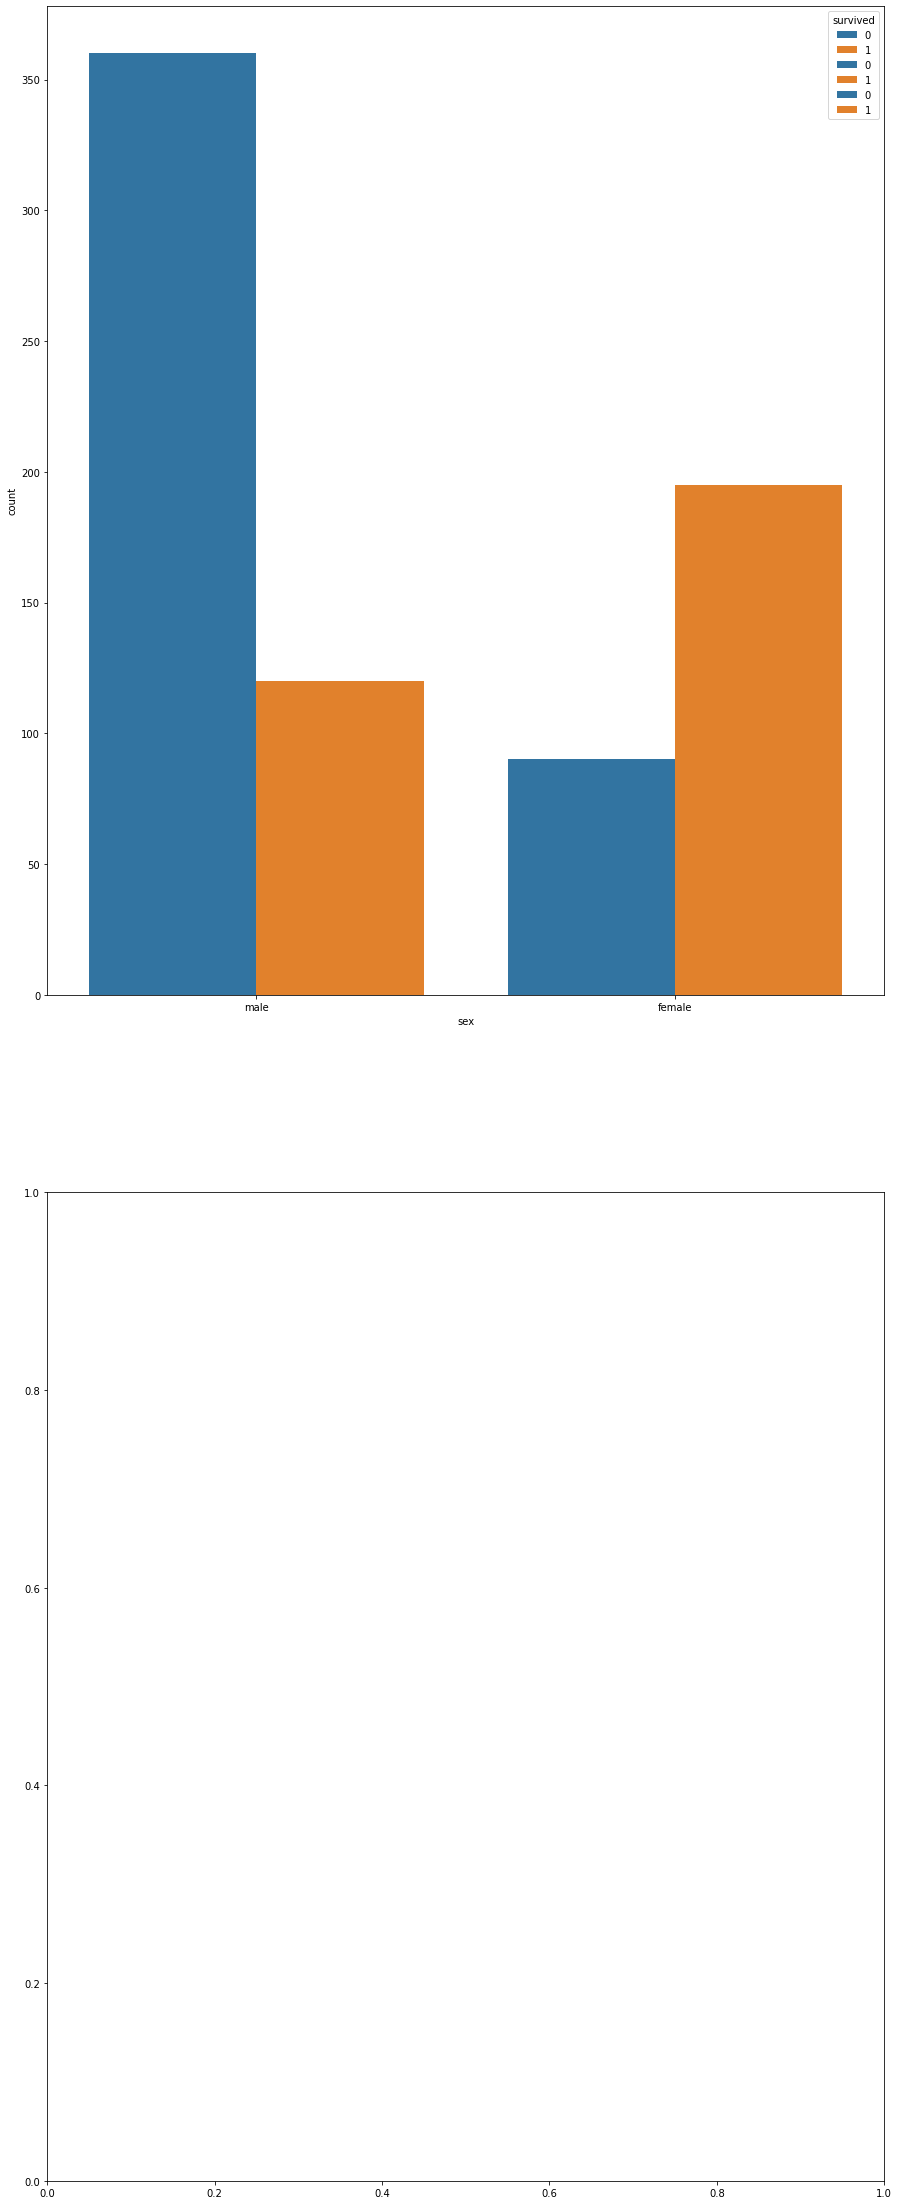

In [34]:
# bar charts to show relationship with price
f, axes = plt.subplots(3, 1, figsize=[15, 40])

sns.countplot('age', hue= 'survived', data=df_new, ax=axes[0])
sns.countplot('pclass', hue= 'survived', data=df_new, ax=axes[0])
sns.countplot('sex', hue= 'survived', data=df_new, ax=axes[0])


# DATA REDUCTION

In [56]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['sex',]
le = LabelEncoder()
# Converting the variables to numerical
#
for i in range(1):
    new = le.fit_transform(df_new[categorical_features[i]])
    df_new[categorical_features[i]] = new
df_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [57]:
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
categorical_features = ['embarked',]
le = LabelEncoder()
# Converting the variables to numerical
#
for i in range(1):
    new = le.fit_transform(df_new[categorical_features[i]])
    df_new[categorical_features[i]] = new
df_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


# IMPLEMENTING THE SOLUTION

# KNN

In [58]:
# Splitting our dataset into its attributes and labels
# ---

# 
X = df_new.drop(['survived','name','passengerid','ticket'], 1)
y = df_new['survived']

In [59]:
# Train Test Split

# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [60]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# Training and Predictions
# ---

# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

# CHALLENGING THE SOLUTION

In [63]:
# Evaluating the Algorithm
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  9]
 [15 49]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        79
           1       0.84      0.77      0.80        64

    accuracy                           0.83       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143



# FOLLOW UP QUESTIONS

a. Did we have the right data

Yes

b. Do we need other data to answer our question

No

c. Did we have the right question

Yes